# State Distribution Example

In this example, we plan to plot the distribution of system states. This helps researchers on serverless computing platforms to debug and test out their performance models with knowledge of system state distribution.

In [1]:
# imports

%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from pacssim.ServerlessSimulator import ServerlessSimulator as Sim

sim = Sim(arrival_rate=0.9, warm_service_rate=1/2.016, cold_service_rate=1/2.163,
            expiration_threshold=600, max_time=100000)
sim.generate_trace(debug_print=False)
sim.print_trace_results()

Cold Starts / total requests: 	 138 / 90078
Cold Start Probability: 	 0.0015
Average Instance Life Span: 	 5720.4611
Average Server Count:  		 7.7591
Average Running Count:  	 1.8155
Average Idle Count:  		 5.9437


You can define any state representation you want based on the data present in the trace.
Here, we chose to use the number of servers as state.

In [13]:
sim.calculate_time_lengths()

# encode states
hist_states = []
for idx in range(len(sim.hist_server_count)):
    if sim.hist_server_count[idx] == 0:
        hist_states.append((0, 'd'))
    else:
        curr_server_count = sim.hist_server_count[idx]
        prev_server_count = sim.hist_server_count[idx-1]
        if curr_server_count > prev_server_count:
            hist_states.append((curr_server_count, 'u'))
        elif curr_server_count < prev_server_count:
            hist_states.append((curr_server_count, 'd'))
        else: # state hasn't changed
            hist_states.append(hist_states[-1])

vals, probs = sim.calculate_time_average(hist_states, skip_init_time=100)
sim.print_time_average(vals, probs)

Value           Prob
(7, 'd')        0.2575
(8, 'd')        0.0563
(8, 'u')        0.3983
(7, 'u')        0.0965
(5, 'u')        0.0010
(10, 'd')       0.0000
(9, 'd')        0.0017
(10, 'u')       0.0265
(6, 'd')        0.0360
(4, 'u')        0.0002
(6, 'u')        0.0010
(11, 'u')       0.0120
(9, 'u')        0.1108
(5, 'd')        0.0022


Value           Prob
4               0.0002
5               0.0032
6               0.0369
7               0.3541
8               0.4545
9               0.1125
10              0.0266
11              0.0120


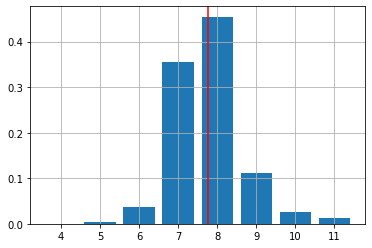

In [12]:
sim.calculate_time_lengths()

unq_vals, val_times = sim.calculate_time_average(sim.hist_server_count, skip_init_time=100)

plt.bar(unq_vals, val_times)
plt.grid(True)
plt.axvline(x=sim.get_average_server_count(), c='r')

sim.print_time_average(unq_vals, val_times)

In [14]:
pd.DataFrame(data = {
    'server_count': unq_vals,
    'Probability': val_times
})

,server_count,Probability
0,4,0.000223
1,5,0.003217
2,6,0.036921
3,7,0.354065
4,8,0.454545
5,9,0.112459
6,10,0.026552
7,11,0.012019
